<a href="https://colab.research.google.com/github/jay-thakur/Fake_News_Classifier/blob/main/fake_news_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset



In [1]:
cd '/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier/'

/content/drive/MyDrive/All/MS/Projects/Fake_News_Classifier


In [2]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
import torch
import torch.nn as nn

# Load the dataset

In [3]:
true_dataset = pd.read_csv('data/True.csv') 
fake_dataset = pd.read_csv('data/Fake.csv') 

In [4]:
true_dataset.shape

(21417, 4)

In [5]:
true_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [6]:
true_dataset.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
fake_dataset.shape

(23481, 4)

In [8]:
fake_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
fake_dataset.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
true_dataset["label"] = np.ones(true_dataset.shape[0], dtype=int)
true_dataset.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [11]:
fake_dataset["label"] = np.zeros(fake_dataset.shape[0], dtype=int)
fake_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [12]:
dataset = pd.concat((true_dataset, fake_dataset), axis=0)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
dataset = dataset.sample(frac=1)
dataset.head()

,title,text,subject,date,label
17590,Death toll from worst Vietnam floods in years ...,HANOI (Reuters) - At least 54 people died and ...,worldnews,"October 13, 2017",1
521,Twitter Has Absolute Field Day Laughing At Tr...,Scientists have been warning the world for wee...,News,"August 21, 2017",0
1664,WATCH: The Simpsons Brutally Parodies Trump’s...,"The long running cartoon, The Simpsons, will o...",News,"April 27, 2017",0
14114,"Besieged Syrians eating trash, fainting from h...",GENEVA (Reuters) - Syrians in the besieged enc...,worldnews,"November 22, 2017",1
12690,U.S. presses Russia to comply with nuclear mis...,WASHINGTON (Reuters) - The United States is re...,worldnews,"December 8, 2017",1


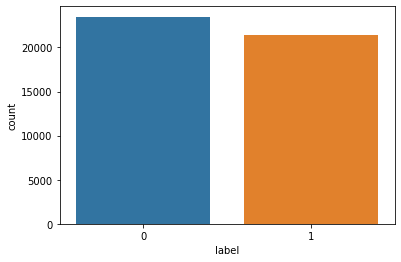

In [14]:
sns.countplot(dataset['label'])
plt.show()

In [15]:
dataset['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [16]:
df = pd.get_dummies(dataset, columns=["subject"])
df.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
17590,Death toll from worst Vietnam floods in years ...,HANOI (Reuters) - At least 54 people died and ...,"October 13, 2017",1,0,0,0,0,0,0,0,1
521,Twitter Has Absolute Field Day Laughing At Tr...,Scientists have been warning the world for wee...,"August 21, 2017",0,0,0,1,0,0,0,0,0
1664,WATCH: The Simpsons Brutally Parodies Trump’s...,"The long running cartoon, The Simpsons, will o...","April 27, 2017",0,0,0,1,0,0,0,0,0
14114,"Besieged Syrians eating trash, fainting from h...",GENEVA (Reuters) - Syrians in the besieged enc...,"November 22, 2017",1,0,0,0,0,0,0,0,1
12690,U.S. presses Russia to comply with nuclear mis...,WASHINGTON (Reuters) - The United States is re...,"December 8, 2017",1,0,0,0,0,0,0,0,1


In [17]:
df = df.drop('date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 17590 to 12350
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 3.0+ MB


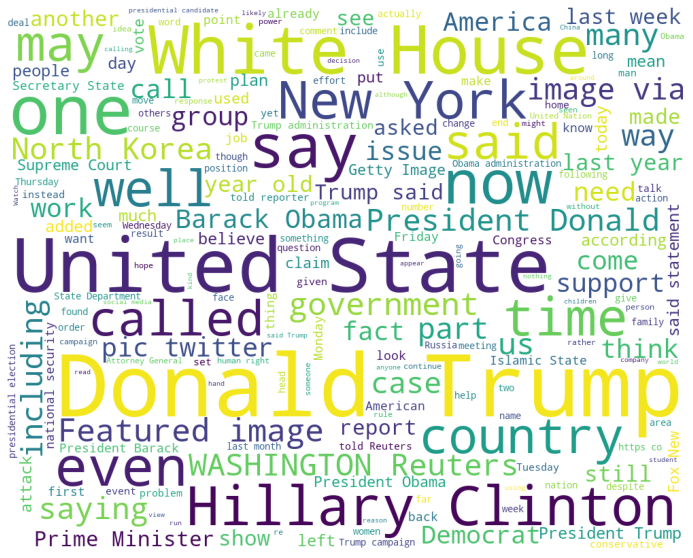

In [18]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', width=1000, height=800)
wordcloud = wordcloud.generate(' '.join(df['text']))

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [19]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Preprocess the data

In [20]:
def preprocess(data):
  pattern = "[^a-zA-Z]"
  lemmatizer = WordNetLemmatizer()
  new = []
  for txt in data:
    txt = txt.lower()
    txt = re.sub(pattern, " ", txt)
    txt = word_tokenize(txt)
    txt = [lemmatizer.lemmatize(word) for word in txt]
    txt = " ".join(txt)
    new.append(txt)
  return new

In [21]:
text_new = preprocess(df.text)
text_new[0]

'hanoi reuters at least people died and went missing a destructive flood battered northern and central vietnam this week the disaster prevention agency said on friday vietnam is prone to destructive storm and flooding due to it long coastline a typhoon wrecked havoc across central province just last month the flood that hit vietnam this week starting on monday are the worst in year state run vietnam television quoted agriculture minister nguyen xuan cuong a saying nineteen people from four neighboring household in hoa binh were buried alive early on thursday after a landslide struck around midnight on wednesday but only nine body have been found the disaster agency said in a report some home have collapsed in flood and landslide this week while more than other house have been submerged or damaged more than hectare acre of rice have also been damaged and around animal killed or washed away flood have also affected seven of province in thailand vietnam s neighbor to the west that country

In [22]:
title_new = preprocess(df.title)
title_new[0]

'death toll from worst vietnam flood in year rise to'

In [23]:
title_vectorizer = CountVectorizer(stop_words="english", max_features = 1000)
text_vectorizer = CountVectorizer(stop_words="english", max_features = 4000)

title_vector = title_vectorizer.fit_transform(title_new).toarray() 
text_vector = text_vectorizer.fit_transform(text_new).toarray()

In [24]:
df.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
17590,Death toll from worst Vietnam floods in years ...,HANOI (Reuters) - At least 54 people died and ...,1,0,0,0,0,0,0,0,1
521,Twitter Has Absolute Field Day Laughing At Tr...,Scientists have been warning the world for wee...,0,0,0,1,0,0,0,0,0
1664,WATCH: The Simpsons Brutally Parodies Trump’s...,"The long running cartoon, The Simpsons, will o...",0,0,0,1,0,0,0,0,0
14114,"Besieged Syrians eating trash, fainting from h...",GENEVA (Reuters) - Syrians in the besieged enc...,1,0,0,0,0,0,0,0,1
12690,U.S. presses Russia to comply with nuclear mis...,WASHINGTON (Reuters) - The United States is re...,1,0,0,0,0,0,0,0,1


In [25]:
df.drop(["title","text"],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 17590 to 12350
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.3 MB


In [26]:
print(df.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)


NameError: ignored

In [ ]:
X = np.concatenate((np.array(df.drop("label", axis=1)), title_vector, text_vector), axis=1)
y = df['label']

In [ ]:
print(X.shape)
print(y.shape)

# Divide the dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Logistic Regression

It models the probabilities of classification problem with two possible outcomes. it value ranges from 0 to 1. The logistic function is defind as - 

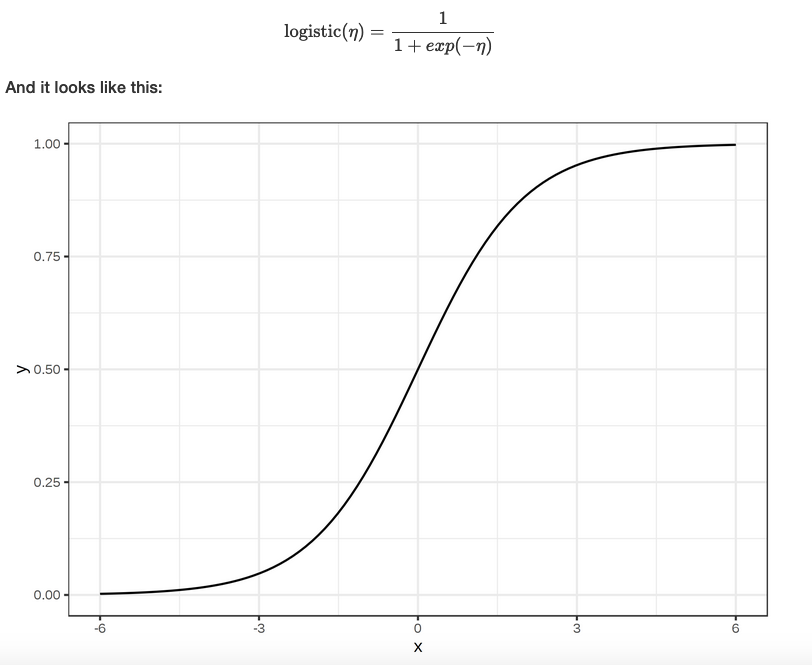

In [ ]:
lr_model = LogisticRegression(max_iter=900)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("accuracy: %0.3f" %(lr_acc*100))

plot_confusion_matrix(lr_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

# cm = confusion_matrix(y_test, lr_pred)
# sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='.2%')
# plt.show()

In [ ]:
plot_precision_recall_curve(lr_model, X_test, y_test)
plt.show()

# Decision Tree Classifier

it uses a tree like structure and their possible combinations to solve a particular problem.

A decision tree consists of a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

While implementing the Decision-Tree algorithm, We make following assumptions -

* At the beginning, the whole training set is considered as the root.
* Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
* Records are distributed recursively on the basis of attribute values.
* Order to placing attributes as root or internal node of the tree is done by using some statistical approach.

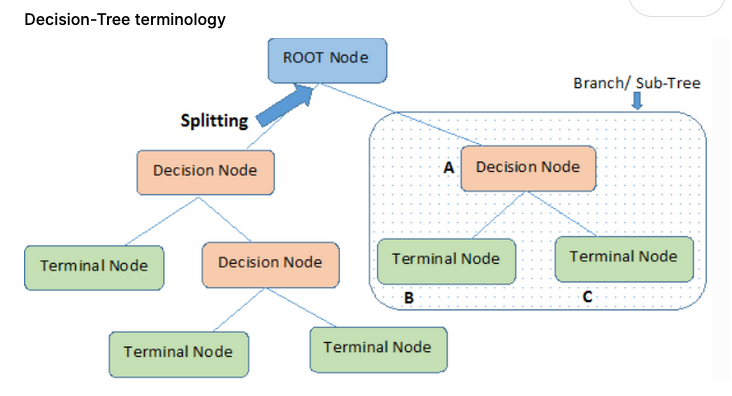


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print("accuracy: %0.3f" %(dt_acc*100))

plot_confusion_matrix(dt_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(dt_model, X_test, y_test)
plt.show()

# Random Forest Classifier

Random forest is made up of several trees & select the best soluction democratically (by voting).

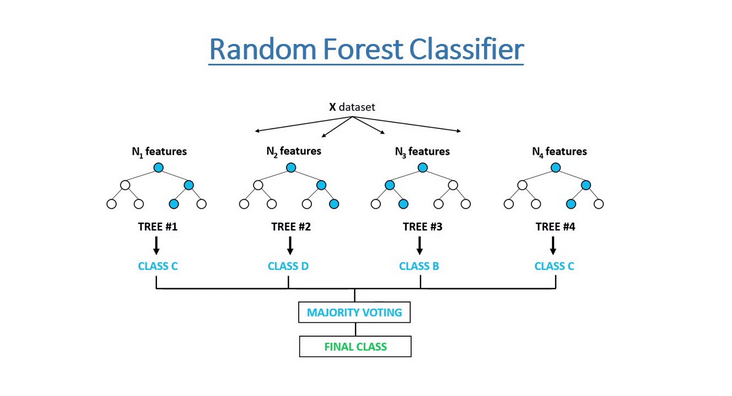

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("accuracy: %0.3f" %(rf_acc*100))

plot_confusion_matrix(rf_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(rf_model, X_test, y_test)
plt.show()

# Naive Bayes

Niave bayes assumes that all the features are independent. it uses the Baye's algorithm to predict probabilities of each class.

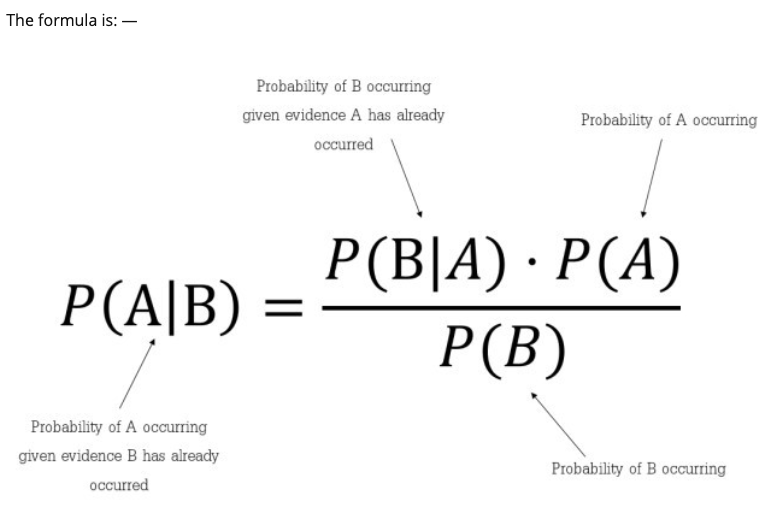

* Gaussian Naive Bayes
* Multinomial Naive Bayes

In [ ]:
nbc_model = MultinomialNB()
nbc_model.fit(X_train, y_train)
nbc_pred = nbc_model.predict(X_test)

nbc_acc = accuracy_score(y_test, nbc_pred)
print("accuracy: %0.3f" %(nbc_acc*100))

plot_confusion_matrix(nbc_model, X_test, y_test, cmap="YlGnBu", values_format='d')
plt.show()

In [ ]:
plot_precision_recall_curve(nbc_model, X_test, y_test)
plt.show()

In [ ]:
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mnb_acc = []
for alpha in alpha_values:
    nbc_model_a = MultinomialNB(alpha)
    nbc_model_a.fit(X_train, y_train)
    nbc_a_pred = nbc_model_a.predict(X_test)
    acc = accuracy_score(y_test, nbc_a_pred)
    mnb_acc.append(acc)
    print(f'alpha: {alpha}, accuracy : {acc*100}')

sns.lineplot(alpha_values, mnb_acc)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

# ANN

Artificial Neural Network is a multi-layer fully connected neural network that consists of an input layer, multiple hidden layer, and an output layer. Every node in a layer is connected to every other node in the next layer.

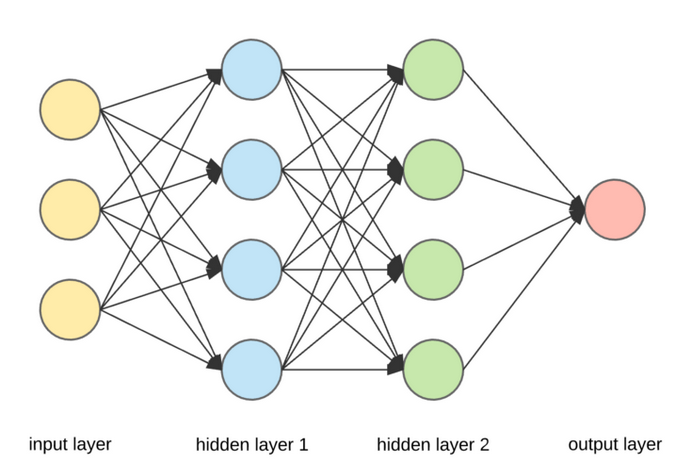


Each node works like this. 
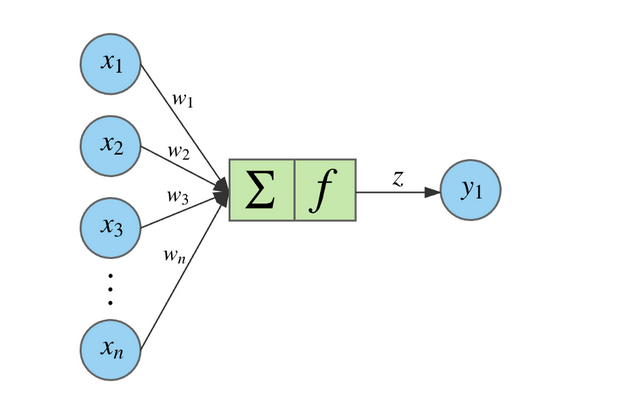

## Activation Layer
the activation function of a node defines the output of that node given an input or set of inputs. perform a transformation on the input received, in order to keep values within a manageable range.
### ReLu

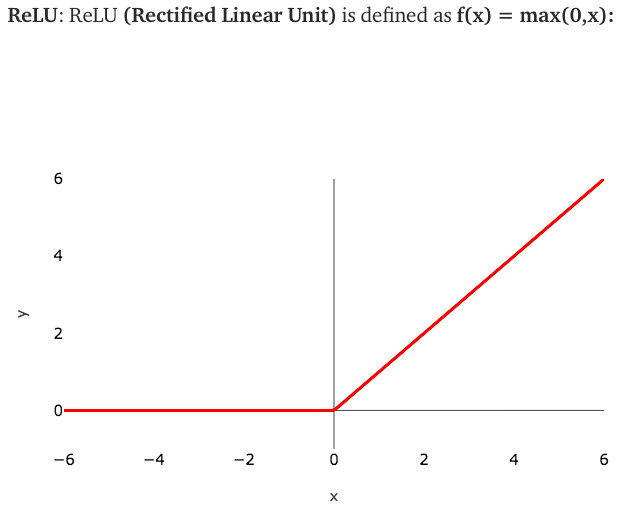

## Dropout Layer

Dropout layer is used to prevent overfitting. dropout means ingore these units. those units wont be considered for forward & backward pass.

In [ ]:
class Simple_Net(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net,self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 20)
        self.relu4 = nn.ReLU()
        
        self.linear5 = nn.Linear(20, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        
        return out
    

model = Simple_Net()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

In [ ]:
X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 20

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch}, Loss : {loss}')

plt.plot(losses)

In [ ]:
y_hat = model(X_test)
y_pred = torch.max(y_hat, 1)[1] # Convert pred into labels
nn_acc = accuracy_score(y_pred, y_test)
print(f'accuracy : {nn_acc*100}%')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

### Experiment

**HyperParameter Tuning** - is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. for example learning rate, batch size

**Overfitting** - When out model performs poor on unseen data, means gives high accuracy on train data but less accuracy on test data, that is called as overfitting.

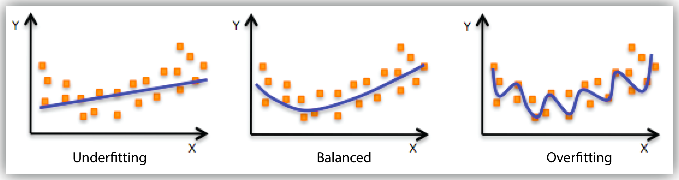


In [ ]:
class Simple_Net1(nn.Module):
    
    def __init__(self):
        
        super(Simple_Net, self).__init__()
        
        self.linear1 = nn.Linear(5008, 2000) 
        self.relu1 = nn.ReLU() 
        
        self.linear2 = nn.Linear(2000, 500) 
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(500, 100)
        self.relu3 = nn.ReLU()
        
        self.linear4 = nn.Linear(100, 50)
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(50, 10)
        self.relu5 = nn.ReLU()
        
        self.linear6 = nn.Linear(10, 2)
        
    
    def forward(self,x):
        
        out = self.linear1(x)
        out = self.relu1(out)
        
        out = self.linear2(out)
        out = self.relu2(out)
        
        out = self.linear3(out)
        out = self.relu3(out)
        
        out = self.linear4(out)
        out = self.relu4(out)

        out = self.linear5(out)
        out = self.relu5(out)

        out = self.linear6(out)
        
        return out
    

model = Simple_Net1()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
error = nn.CrossEntropyLoss()

X_train = torch.Tensor(X_train)

y_train = torch.Tensor(y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

epochs = 50

losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    loss = error(output, y_train)
    loss.backward()
    optimizer.step()

    losses.append(loss)
    print(f'Epoch : {epoch+1}, Loss : {loss}')

y_hat = model(X_test)
y_pred = torch.max(y_hat,1)[1] # Convert pred into labels

nn_acc_4_hl = accuracy_score(y_pred, y_test)
print(f'accuracy on 4 hidden layer : {nn_acc_4_hl}')

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='d')
plt.show()

# Model Accuracies

In [ ]:
models_accuracies = pd.DataFrame([["Logistic Regression", lr_acc], ["Naive Bayes", nbc_acc], ["Decision Tree", dt_acc],
                       ["Random Forest", rf_acc], ["Simple ANN", nn_acc]], columns=["Model", "Accuracy"])
models_accuracies

In [ ]:
x = ['LR', 'DT', 'RF', 'NB', 'ANN']
y = [lr_acc, dt_acc, rf_acc, nbc_acc, nn_acc]
sns.barplot(x, y)
plt.show()

## My Contribution



## Challanges & solutions



## References

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://www.kaggle.com/mehmetlaudatekman/detailed-fake-news-classification-with-pytorch-98

http://datamine.unc.edu/jupyter/notebooks/Text%20Mining%20Modules/(1)%20Text%20Preprocessing.ipynb

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://docs.aws.amazon.com/machine-learning/latest/dg/model-fit-underfitting-vs-overfitting.html

http://faculty.cas.usf.edu/mbrannick/regression/Logistic.html

https://christophm.github.io/interpretable-ml-book/logistic.html

https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial

https://www.kdnuggets.com/2020/06/naive-bayes-algorithm-everything.html

https://towardsdatascience.com/naive-bayes-classifier-81d512f50a7c

https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0

https://en.wikipedia.org/wiki/Activation_function

https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253

https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5



In [ ]:
# X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
# x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)